# Data Preprocessing

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# read the data
data = pd.read_csv('Bank_Dataset.csv')

# data cleaning
data_subset = data.drop(['CustomerId', 'Surname', 'Exited',"Geography"], axis = 1)

data_clean = data_subset.copy()

data_clean.Gender = np.where(data_clean.Gender == 'Female', 1, 0)

data_clean['ProductsPerYear'] = np.where(data_clean.Tenure == 0, data_clean.NumOfProducts, data_clean.NumOfProducts / data_clean.Tenure)

# scaling the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_clean), columns = data_clean.columns)



# Model Training

In [13]:
from sklearn.cluster import KMeans

# fit the model
kmeans3 = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
kmeans3.fit(df_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

# Cluster Vizualization

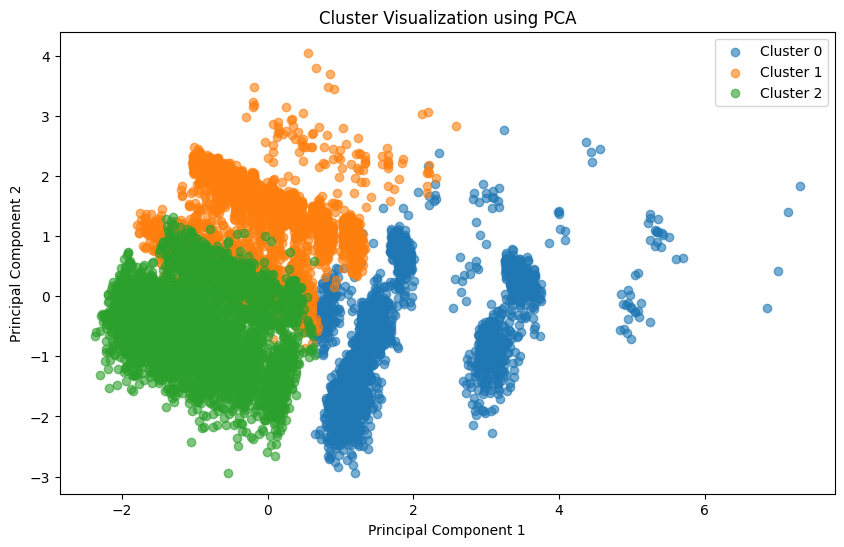

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

# Add cluster labels to the data
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans3.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(df_pca['Cluster'].unique()):
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster]['PCA1'],
        df_pca[df_pca['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}', alpha=0.6
    )

plt.title("Cluster Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Testing model

In [15]:

# example test data
test_values = [650, 1, 39, 6, 0, 1, 1, 0, 100000, 0.2]

# column names matching the original training data
columns = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'ProductsPerYear']

# convert the test values into a 2D array (1 row, multiple columns)
test_values_reshaped = np.array(test_values).reshape(1, -1)  # reshape to 1 sample with multiple features


# now scale the test data using the same scaler, convert to DataFrame with correct columns
test_data = pd.DataFrame(test_values_reshaped, columns=columns)
test_scaled = scaler.transform(test_data)

# predict using the trained KMeans model (kmeans5)
predicted_cluster = kmeans3.predict(test_scaled)

# output the predicted cluster
print(f"Predicted Cluster: {predicted_cluster[0]}")



Predicted Cluster: 1


/Users/darisdragusha/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Labeling Dataset

In [16]:
# append cluster label to customer 
original_data = data.copy()
cluster_labels = kmeans3.labels_
original_data['Cluster'] = cluster_labels
# save the DataFrame to a CSV file
original_data.to_csv('clustered_data.csv', index=False)

# Saving the Scaler and Model for Future Use

In [17]:
import pickle

with open('scaler_and_model.pkl', 'wb') as f:
    pickle.dump({'scaler': scaler, 'model': kmeans3}, f)